Find the top five authors per year since 2020 and the number of contributions, top five authors in the time period 2020 to 2023 and their number of contributions per year, top five journals overall and in the past 5 years, the distribution of the top five authors' from 2020 contributions to various journals since 2020.

Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import IPython.display as ipd

Load Datasets

In [12]:
#Read the datasets into pandas dataframes

articles = pd.read_csv('../data/articles.leptospirosis.csv')
authors = pd.read_csv('../data/authors.leptospirosis.csv')
paper_counts = pd.read_csv('../data/paper_counts.csv')

View the datasets

In [13]:
# View the articles dataset
ipd.display("Leptospirosis Articles: ", articles.head())

#View the authors dataset
ipd.display("Leptospirosis Authors: ", authors.head())

# View the paper counts dataset
ipd.display("Leptospirosis Paper Counts: ", paper_counts.head())

'Leptospirosis Articles: '

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10548299,Risk factors for death and changing patterns i...,The risk factors for death and changes in clin...,0002-9637,The American journal of tropical medicine and ...,(61) 630-4,1999,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10569777,Leptospiral outer membrane proteins OmpL1 and ...,New vaccine strategies are needed for preventi...,0019-9567,Infection and immunity,(67) 6572-82,1999,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."
2,10585813,Acute lung injury in leptospirosis: clinical a...,Forty-two consecutive patients with leptospiro...,1058-4838,Clinical infectious diseases : an official pub...,(29) 1561-3,1999,P C,Marotto,PC,"Intensive Care Unit, Instituto de Infectologia..."
3,10586903,Assessment of the efficacy of an IgM-elisa and...,In a prospective study in Barbados between 197...,0002-9637,The American journal of tropical medicine and ...,(61) 731-4,1999,P,Cumberland,P,"Infectious Disease Epidemiology Unit, London S..."
4,10596270,[An old disease with a new face: canine leptos...,The clinical features of the disease are prese...,0036-7281,Schweizer Archiv fur Tierheilkunde,(141) 499-507,1999,A,Steger-Lieb,A,"Klinik für kleine Haustiere, Universität Bern."


'Leptospirosis Authors: '

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10548299,1,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de..."
1,10548299,2,D M,Zanetta,DM,NaN
2,10548299,3,M B,Cavalcante,MB,NaN
3,10548299,4,R C,Abdulkader,RC,NaN
4,10569777,1,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa..."


'Leptospirosis Paper Counts: '

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1


Merge articles and authors datasets using only Year and Journal from the articles dataset

In [14]:
articles_authors = pd.merge(authors, articles[['PMID', 'Year', 'Journal']], on='PMID', how='outer')
ipd.display("Merged dataset: ", articles_authors.head())


'Merged dataset: '

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Year,Journal
0,10548299,1.0,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de...",1999,The American journal of tropical medicine and ...
1,10548299,2.0,D M,Zanetta,DM,NaN,1999,The American journal of tropical medicine and ...
2,10548299,3.0,M B,Cavalcante,MB,NaN,1999,The American journal of tropical medicine and ...
3,10548299,4.0,R C,Abdulkader,RC,NaN,1999,The American journal of tropical medicine and ...
4,10569777,1.0,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa...",1999,Infection and immunity


Check for null rows in the merged dataset

In [15]:
articles_authors.isnull().sum()

,0
PMID,0
AuthorN,2
AuthorForename,12
AuthorLastname,2
AuthorInitials,36
AuthorAffiliation,8008
Year,0
Journal,0


Data Cleaning

Drop rows with AuthonN, Forename, Lastname and Initials as null

In [16]:
articles_authors = articles_authors[~articles_authors.iloc[:, 1:5].isna().all(axis=1)]
ipd.display("New null counts: ", articles_authors.isnull().sum())

'New null counts: '

,0
PMID,0
AuthorN,0
AuthorForename,10
AuthorLastname,0
AuthorInitials,34
AuthorAffiliation,8006
Year,0
Journal,0


Create AuthorName column combining AuthorInitials and AuthorLastname

In [17]:
# Ensure all columns used for author names are strings, and handle any NaN values by replacing them with empty strings
articles_authors.loc[:, 'AuthorLastname'] = articles_authors['AuthorLastname'].fillna('').astype(str)
articles_authors.loc[:, 'AuthorInitials'] = articles_authors['AuthorInitials'].fillna('').astype(str)

# Concatenate the initials, and lastname to form the author's name
articles_authors.loc[:, 'AuthorName'] = articles_authors['AuthorInitials'] + ' ' + articles_authors['AuthorLastname']

# Display the dataframe
ipd.display("Authors and articles merged dataset with AuthorName column: ", articles_authors.head())

<ipython-input-17-937fa219d9db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_authors.loc[:, 'AuthorName'] = articles_authors['AuthorInitials'] + ' ' + articles_authors['AuthorLastname']


'Authors and articles merged dataset with AuthorName column: '

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Year,Journal,AuthorName
0,10548299,1.0,E,Daher,E,"Departamento de Medicina Clínica, Faculdade de...",1999,The American journal of tropical medicine and ...,E Daher
1,10548299,2.0,D M,Zanetta,DM,NaN,1999,The American journal of tropical medicine and ...,DM Zanetta
2,10548299,3.0,M B,Cavalcante,MB,NaN,1999,The American journal of tropical medicine and ...,MB Cavalcante
3,10548299,4.0,R C,Abdulkader,RC,NaN,1999,The American journal of tropical medicine and ...,RC Abdulkader
4,10569777,1.0,D A,Haake,DA,"Division of Infectious Diseases, Veterans Affa...",1999,Infection and immunity,DA Haake


Find the top 5 authors for each year from 2020 to 2023 and their publication counts

In [18]:
# Filter the dataset to include articles between 2020 and 2023
articles_20_23 = articles_authors[articles_authors['Year'].between(2020, 2023)]

# Group by Year and AuthorName to count the number of papers each author has written per year
author_yearly_counts = articles_20_23.groupby(['Year', 'AuthorName']).size().reset_index(name='PaperCount')

# Select the top 5 authors per year
top5_authors_per_year = author_yearly_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'PaperCount'))

# Display results
top5_authors_per_year.set_index(['Year', 'AuthorName'], inplace=True)
ipd.display(top5_authors_per_year)

<ipython-input-18-1a55823e596c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_authors_per_year = author_yearly_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'PaperCount'))


PaperCount
Year AuthorName                   
2020 M Picardeau                 7
     Z Sekawi                    6
     AI Ko                       5
     ALTO Nascimento             5
     C Goarant                   5
2021 F Costa                     6
     M Picardeau                 6
     JE Nally                    5
     MB Heinemann                5
     N Koizumi                   5
2022 JE Nally                    8
     F Costa                     6
     W Lilenbaum                 6
     AI Ko                       5
     J Warnasekara               5
2023 W Lilenbaum                 8
     MIN Di Azevedo              6
     L Aymée                     5
     FA Carvalho-Costa           4
     J Benschop                  4

View the top 5 authors in the period 2020 to 2023 and their publication counts

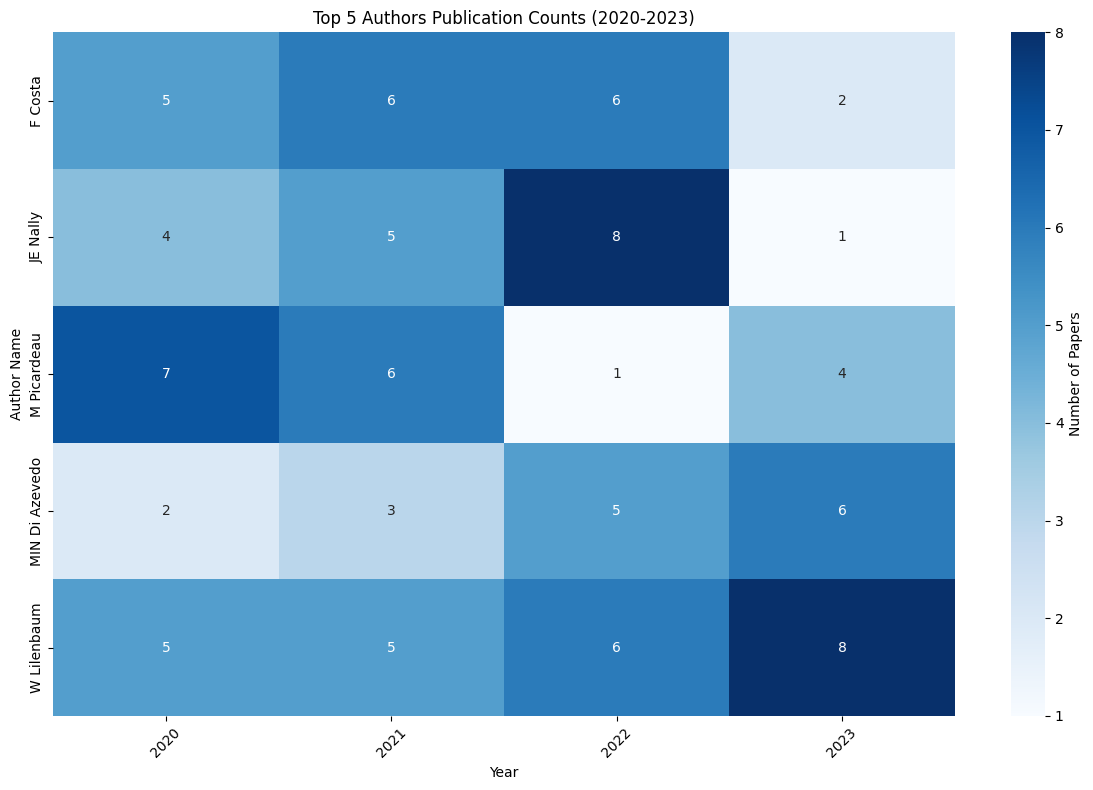

In [19]:
# Sum the paper counts for each author over the period 2020 to 2023
author_total_papers = author_yearly_counts.groupby('AuthorName')['PaperCount'].sum().reset_index()

# Find the top 5 authors based on total paper counts from 2020 to 2023
top5_authors = author_total_papers.nlargest(5, 'PaperCount')

# Get the list of the top authors names
top5_authors_list = top5_authors['AuthorName'].unique()

# Filter the full dataset to include only the top authors
top5_authors_20_23 = author_yearly_counts[author_yearly_counts['AuthorName'].isin(top5_authors_list)]

# Pivot the data to create a matrix where rows are authors, columns are years, and values are paper counts
heatmap_data = top5_authors_20_23.pivot_table(index='AuthorName', columns='Year', values='PaperCount', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar_kws={'label': 'Number of Papers'}, fmt='d')
plt.title('Top 5 Authors Publication Counts (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Author Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the heatmap
plt.show()


Find the top 5 journals of all time and in the past 5 years

In [20]:
# Calculate the top journals of all time (across all years)
top_journals_all_time_df = articles.groupby("Journal").size().reset_index(name="ArticleCount")

# Calculate the top journals of the last 5 years
# Filter for the last 5 years
current_year = articles["Year"].max()
past_5_years = articles[articles["Year"] >= current_year - 5]

top_journals_past_5_df = past_5_years.groupby("Journal").size().reset_index(name="ArticleCount")

# Sort and select top 5 for each category
top_journals_all_time = top_journals_all_time_df.sort_values("ArticleCount", ascending=False).head(5)
top_journals_past_5 = top_journals_past_5_df.sort_values("ArticleCount", ascending=False).head(5)

# Add a column to distinguish between the two datasets
top_journals_all_time["TimePeriod"] = "All Time"
top_journals_past_5["TimePeriod"] = "Past 5 Years"

# Combine the datasets
combined_df = pd.concat([top_journals_all_time, top_journals_past_5])

# Create the bar chart with counts on the bars
fig = px.bar(
    combined_df,
    x="Journal",
    y="ArticleCount",
    color="TimePeriod",  # Differentiate between All Time and Past 5 Years
    title=f"Top 5 Journals: All Time vs. Past 5 Years",
    labels={"ArticleCount": "Number of Articles", "Journal": "Journal"},
    color_discrete_map={"All Time": "blue", "Past 5 Years": "red"},
    barmode="group",  # group bars side by side for comparison
    text="ArticleCount"  # Display the count on the bars
)

# Update layout to adjust text positioning and format
fig.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    showlegend=True,
    height=800
)

# Customize the appearance of text on the bars
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

fig.show()

Determine the journals to which the top 5 authors from 2020 to 2023 contributed to in the same time period. Include a journal only if atleast 2 articles have been published in it in this time period

In [21]:
# Group by AuthorName & Journal, count papers per author per journal
author_journal_counts = articles_20_23.groupby(['AuthorName', 'Journal'])['Journal'].count().reset_index(name='PaperCount')

# Filter for top 5 authors & contributions with at least 2 papers
filtered_data = author_journal_counts.query("AuthorName in @top5_authors_list and PaperCount >= 2")

# Pivot the data for the stacked bar chart
pivot_data = filtered_data.pivot(index='AuthorName', columns='Journal', values='PaperCount').fillna(0).reset_index()

# Convert pivoted data into long format for plotting
pivot_data_melted = pivot_data.melt(id_vars='AuthorName', var_name='Journal', value_name='PaperCount')

# Create the interactive bar chart
fig = px.bar(
    pivot_data_melted,
    x='Journal',
    y='PaperCount',
    color='AuthorName',
    title="Top 5 Authors Contributions to Journals (2020-2023)",
    labels={'AuthorName': 'Author Name', 'PaperCount': 'Number of Papers'},
    height=600,
    color_discrete_sequence=px.colors.diverging.Spectral
)

# Update layout for better visualization
fig.update_layout(
    barmode='stack',
    xaxis_tickangle=40,
    xaxis_title="Journal Name",
    yaxis_title="Number of Papers",
    legend_title="Author"
)

# Show the interactive plot
fig.show()

# Save as html
fig.write_html('AuthorJournalContributions.html')
